# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [2]:
file_path = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_table(file_path, sep = '\t')

### Step 4. See the first 10 entries

In [3]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

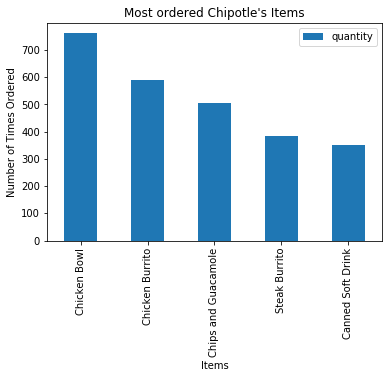

In [4]:
top_five = (chipo[['item_name','quantity']]).groupby("item_name").sum().sort_values(by=["quantity"], ascending = False).head(5)

# create the plot
top_five.plot(kind='bar')

# Set the title and labels
plt.xlabel('Items')
plt.ylabel('Number of Times Ordered')
plt.title('Most ordered Chipotle\'s Items')

# show the plot
plt.show()



### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

(0, 36.7178857951459)

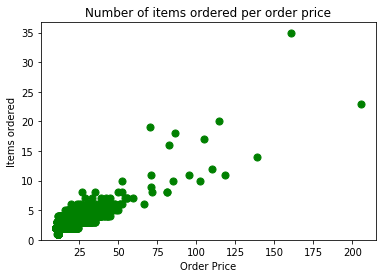

In [6]:

# create a list of prices
item_price_float = chipo.copy(deep=True)chipo.item_price = [float(value[1:-1]) for value in item_price_float.item_price] # strip the dollar sign and trailing space
# d = []
# for value in chipo.item_price:
#      d.append(float(value[1:-1]))

# then groupby the orders and sum
orders = item_price_float.groupby('order_id').sum()

# creates the scatterplot
# plt.scatter(orders.quantity, orders.item_price, s = 50, c = 'green')
plt.scatter(x = orders.item_price, y = orders.quantity, s = 50, c = 'green')

# Set the title and labels
plt.xlabel('Order Price')
plt.ylabel('Items ordered')
plt.title('Number of items ordered per order price')
plt.ylim(0)

### Step 7. BONUS: Create a question and a graph to answer your own question.

In [7]:
a = chipo[['quantity','item_name','item_price']].groupby('item_name').sum()
a['per_item_price'] = a.item_price/a.quantity
sort = a.sort_values(by='per_item_price', ascending = False).drop(columns='item_price')
sort.head()

,quantity,per_item_price
item_name,,
Steak Salad Bowl,31,11.083548
Carnitas Salad Bowl,6,11.056667
Barbacoa Salad Bowl,10,10.640000
Carnitas Bowl,71,10.376197
Steak Bowl,221,10.227104


(0, 799.017885795146)

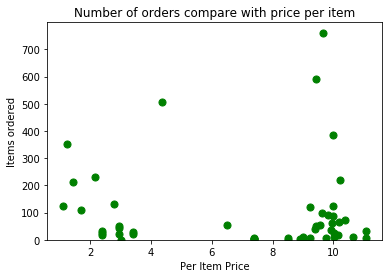

In [8]:
# creates the scatterplot
# plt.scatter(orders.quantity, orders.item_price, s = 50, c = 'green')
plt.scatter(x = sort.per_item_price, y = sort.quantity, s = 50, c = 'green')

# Set the title and labels
plt.xlabel('Per Item Price')
plt.ylabel('Items ordered')
plt.title('Number of orders compare with price per item')
plt.ylim(0)